In [1]:
# Parameters
input_file = "output_data_exploration.csv"

In [2]:
# Parameters
input_file = "output_data_exploration.csv"


listed_in
Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
                                                   ... 
TV Comedies, TV Dramas, TV Mysteries                  1
Classic Movies, Dramas, LGBTQ Movies                  1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy        1
Docuseries, Reality TV, Teen TV Shows                 1
Reality TV, Spanish-Language TV Shows                 1
Name: count, Length: 461, dtype: int64


The plot has been saved successfully as 'Most Watched Genres on Netflix.png'.


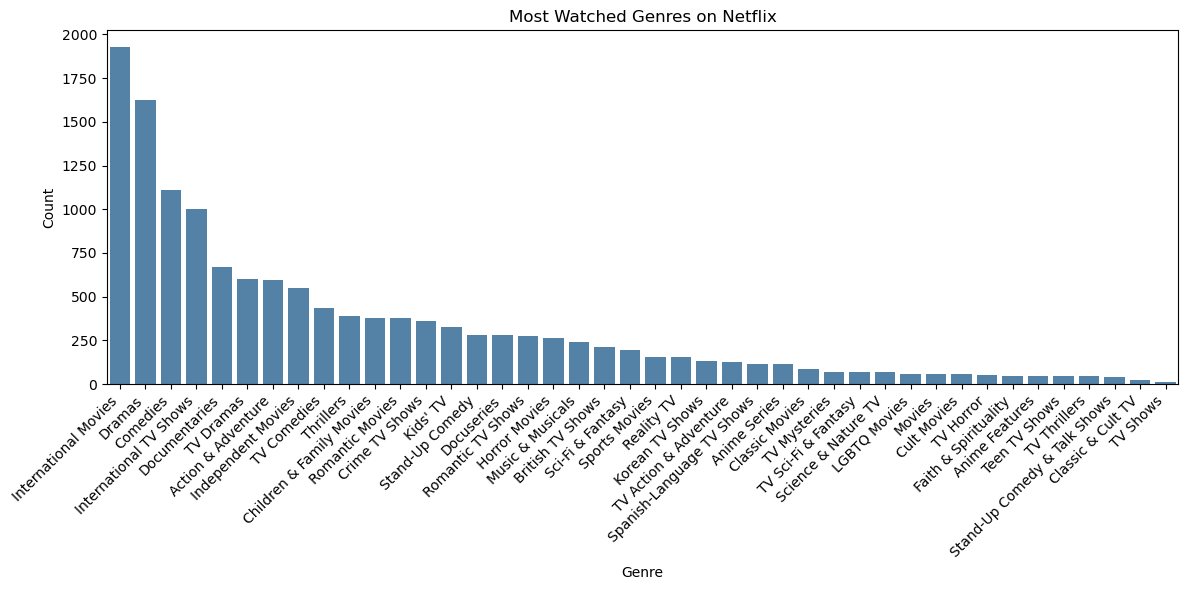

The plot has been saved successfully as 'Distribution of Ratings on Netflix.png'.


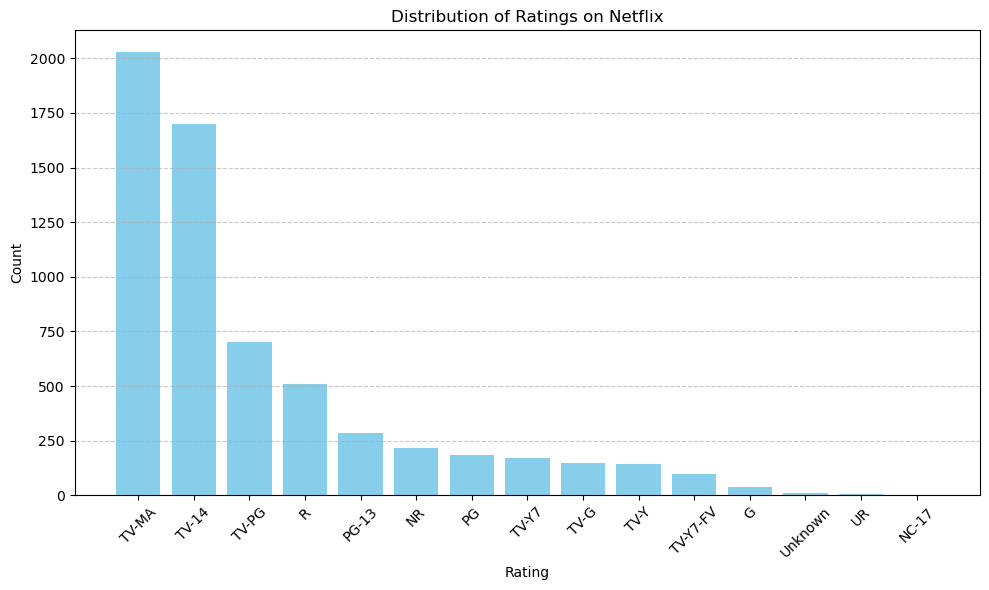

The plot has been saved successfully as 'Distribution of Content Type.png'.


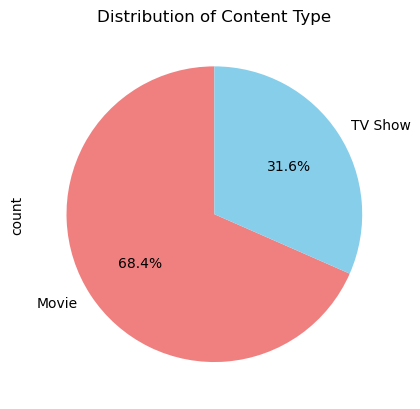

The plot has been saved successfully as 'Top 20 Release Years by Number of Titles.png'.


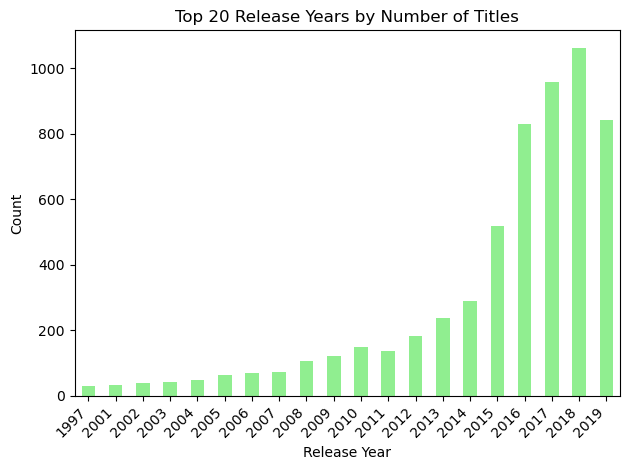

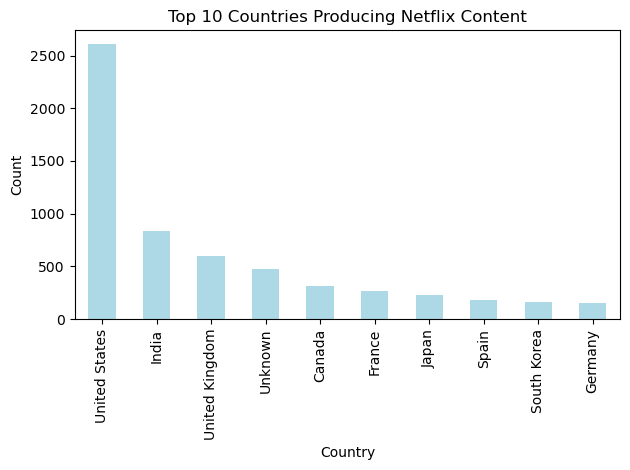

In [3]:


# Import necessary libraries
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


df = pd.read_csv(input_file)

# Group data by genre and count the number of shows per genre
genre_counts = df['listed_in'].value_counts()
print(genre_counts)



try:
    # Step 1: Split the 'listed_in' column into individual genres and flatten the list
    # Drop NaN values, split the genres by commas, and flatten the list into a single list of genres
    if 'listed_in' not in df.columns:
        raise KeyError("The 'listed_in' column is missing in the dataset.")
    
    all_genres = df['listed_in'].dropna().str.split(', ').sum()  # Drop NaN values and split by comma
    
    if not all_genres:
        raise ValueError("No genres found after processing 'listed_in' column.")
    
    # Step 2: Count the frequency of each genre using Counter
    genre_counts = Counter(all_genres)

    # Step 3: Convert the genre counts into a DataFrame for better visualization
    genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
    
    if genre_df.empty:
        raise ValueError("The genre counts DataFrame is empty, check the 'listed_in' column.")
    
    # Step 4: Plotting the bar chart using Seaborn
    plt.figure(figsize=(12, 6))  # Set the size of the plot
    
    sns.barplot(x='Genre', y='Count', data=genre_df, color='steelblue')  # Plot the genres against their counts
    
    # Step 5: Adjust the plot for readability
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels 45 degrees and align them to the right
    plt.title('Most Watched Genres on Netflix')  # Set the title of the plot
    plt.xlabel('Genre')  # Label the x-axis
    plt.ylabel('Count')  # Label the y-axis
    
    # Step 6: Make sure the plot layout is adjusted to avoid clipping of labels
    plt.tight_layout()  # Adjust layout to prevent labels from being cut off
    
    # Step 7: Save the plot to a file
    plot_filename = "Most Watched Genres on Netflix.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')  # Save with high resolution and tight bounding box
    
    print(f"The plot has been saved successfully as '{plot_filename}'.")

    # Step 8: Display the plot
    plt.show()  # Show the plot to the user

except KeyError as e:
    # Handle cases where the expected column is missing
    print(f"Column error: {e}")
except ValueError as e:
    # Handle cases where there is no data or issues with the dataset
    print(f"Data error: {e}")
except Exception as e:
    # Catch any other unexpected errors
    print(f"An unexpected error occurred: {e}")


try:
    # Step 1: Count the occurrences of each rating
    # The 'value_counts' function counts the number of occurrences of each unique value in the 'rating' column
    if 'rating' not in df.columns:
        raise KeyError("The 'rating' column is missing in the dataset.")
    
    rating_counts = df['rating'].value_counts()

    # Step 2: Plotting the ratings distribution using a bar chart
    # Create a new figure with a specific size (10x6 inches)
    plt.figure(figsize=(10, 6))

    # Plot the bar chart using the ratings and their corresponding counts
    # The x-axis will be the unique ratings and the y-axis will represent the count of each rating
    plt.bar(rating_counts.index, rating_counts.values, color='skyblue')

    # Step 3: Set the title and axis labels for the chart
    plt.title('Distribution of Ratings on Netflix')  # Set the title of the plot
    plt.xlabel('Rating')  # Label the x-axis with 'Rating'
    plt.ylabel('Count')  # Label the y-axis with 'Count'

    # Step 4: Rotate x-axis labels to make them more readable
    # Rotate the x-axis labels by 45 degrees for better readability
    plt.xticks(rotation=45)

    # Step 5: Add gridlines to the y-axis for better visual clarity
    # The gridlines will be dashed and have a slight transparency (alpha=0.7) to make them less intrusive
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Step 6: Adjust the layout to avoid clipping of labels and titles
    plt.tight_layout()  # This ensures that the plot fits well within the figure area and nothing is cut off

    # Step 7: Save the plot to a file
    plot_filename = "Distribution of Ratings on Netflix.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')  # Save with high resolution and tight bounding box
    
    print(f"The plot has been saved successfully as '{plot_filename}'.")
    
    # Step 8: Display the plot
    plt.show()  # Show the plot to the user


except KeyError as e:
    # Handle the case where the 'rating' column is missing
    print(f"Error: {e}")
except Exception as e:
    # Catch any other unexpected errors
    print(f"An unexpected error occurred: {e}")



try:
    # Step 1: Check if the 'type' column exists in the dataset
    if 'type' not in df.columns:
        raise KeyError("The 'type' column is missing in the dataset.")
    
    # Step 2: Plotting the distribution of content type as a pie chart
    # The 'value_counts()' function counts the occurrences of each content type
    # Plotting the pie chart with percentages displayed on the chart
    df['type'].value_counts().plot(kind='pie', 
                                   autopct='%1.1f%%',   # Display percentage with 1 decimal place
                                   startangle=90,       # Start the pie chart at 90 degrees
                                   colors=['lightcoral', 'skyblue'])  # Pie slice colors

    # Step 3: Set the title of the plot
    plt.title('Distribution of Content Type')  # Title for the pie chart

    # Step 4: Save the plot to a file
    plot_filename = "Distribution of Content Type.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')  # Save with high resolution and tight bounding box
    
    print(f"The plot has been saved successfully as '{plot_filename}'.")

    

    # Step 5: Show the plot
    plt.show()  # Display the pie chart

except KeyError as e:
    # Handle the case where the 'type' column is missing
    print(f"Error: {e}")
except Exception as e:
    # Catch any other unexpected errors
    print(f"An unexpected error occurred: {e}")


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Step 1: Check if 'release_year' column exists in the dataset
    if 'release_year' not in df.columns:
        raise KeyError("The 'release_year' column is missing in the dataset.")
    
    # Step 2: Get the top 20 release years based on the number of titles
    top_10_years = df['release_year'].value_counts().head(20).sort_index()

    # Step 3: Plotting the bar chart for the top 20 release years
    top_10_years.plot(kind='bar', color='lightgreen')  # Bar plot with light green color

    # Step 4: Add title and axis labels
    plt.title('Top 20 Release Years by Number of Titles')  # Title of the bar chart
    plt.xlabel('Release Year')  # Label for the x-axis
    plt.ylabel('Count')  # Label for the y-axis

    # Step 5: Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels and align them to the right

    # Step 6: Adjust layout to prevent clipping of labels
    plt.tight_layout()  # This ensures that the plot fits well within the figure area and labels are not cut off
    plot_filename = "Top 20 Release Years by Number of Titles.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')  # Save with high resolution and tight bounding box
    
    print(f"The plot has been saved successfully as '{plot_filename}'.")

    # Step 7: Display the plot
    plt.show()  # Show the bar chart to the user

except KeyError as e:
    # Handle the case where the 'release_year' column is missing
    print(f"Error: {e}")
except Exception as e:
    # Catch any other unexpected errors
    print(f"An unexpected error occurred: {e}")



try:
    # Step 1: Check if 'country' column exists in the dataset
    if 'country' not in df.columns:
        raise KeyError("The 'country' column is missing in the dataset.")
    
    # Step 2: Get the top 10 countries producing Netflix content
    # First, split the 'country' column by commas, then explode it to get a list of individual countries
    countries = df['country'].str.split(', ').explode().value_counts().head(10)  # Top 10 countries

    # Step 3: Plotting the bar chart for the top 10 countries
    countries.plot(kind='bar', color='lightblue')  # Bar plot with light blue color

    # Step 4: Add title and axis labels
    plt.title('Top 10 Countries Producing Netflix Content')  # Title of the bar chart
    plt.xlabel('Country')  # Label for the x-axis
    plt.ylabel('Count')  # Label for the y-axis

    # Step 5: Adjust layout to prevent clipping of labels and titles
    plt.tight_layout()  # Ensure that the plot fits well within the figure area and labels are not cut off
    plot_filename = "Top 10 Countries Producing Netflix Content.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')  # Save with high resolution and tight bounding box

    # Step 6: Display the plot
    plt.show()  # Show the bar chart to the user

except KeyError as e:
    # Handle the case where the 'country' column is missing
    print(f"Error: {e}")
except Exception as e:
    # Catch any other unexpected errors
    print(f"An unexpected error occurred: {e}")


